In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('MobileDataSets\MobileTrain.csv')
df_test = pd.read_csv('MobileDataSets\MobileTest.csv')

In [4]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [6]:
df_train.shape, df_test.shape

((2000, 21), (1000, 21))

In [7]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [11]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [13]:
df_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [14]:
df_test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [15]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [17]:
df_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [18]:
df_test.nunique()

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

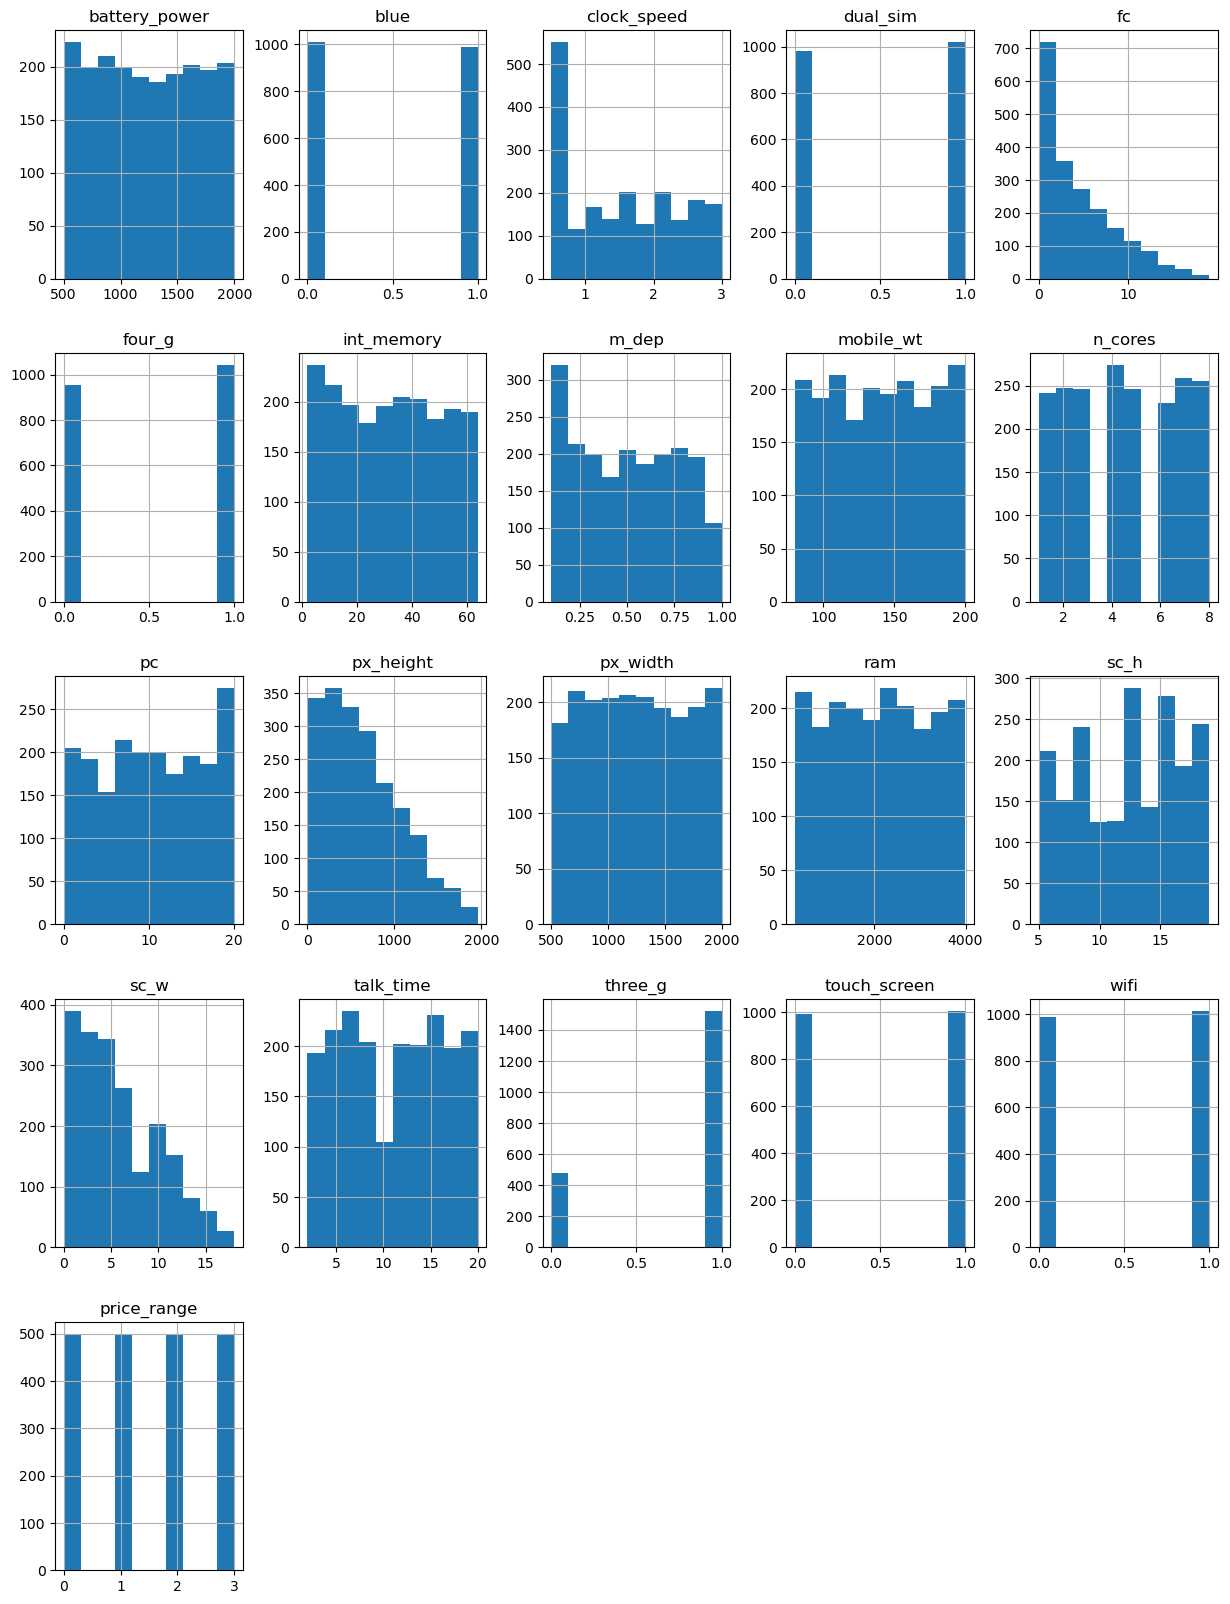

In [19]:
df_train.select_dtypes(include=['int64','float64']).hist(figsize=(15,20))
plt.show()

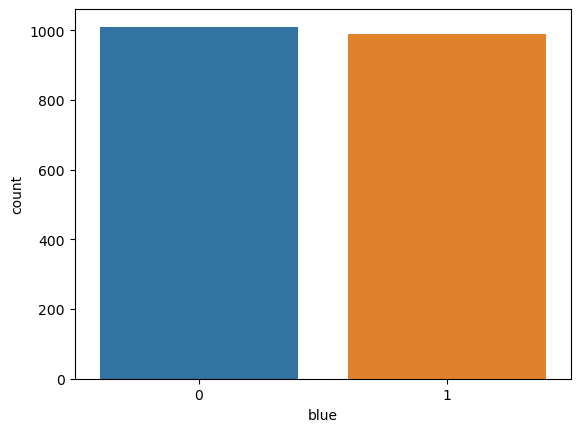

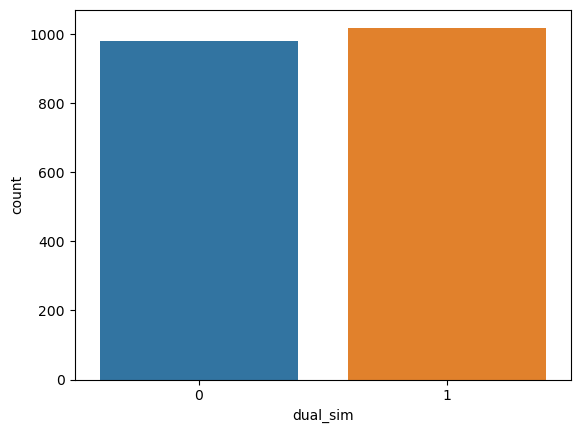

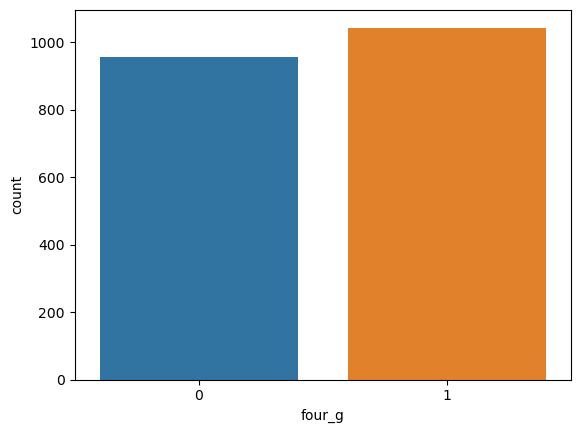

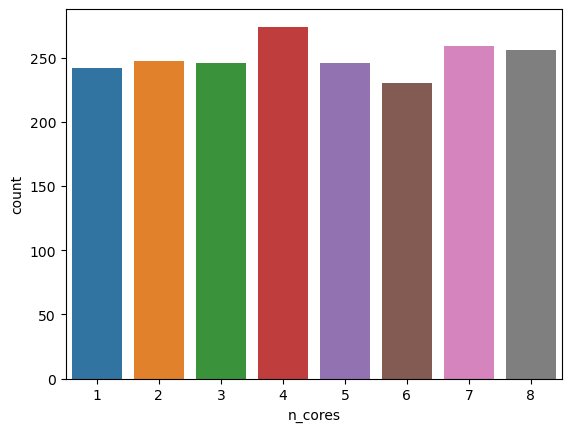

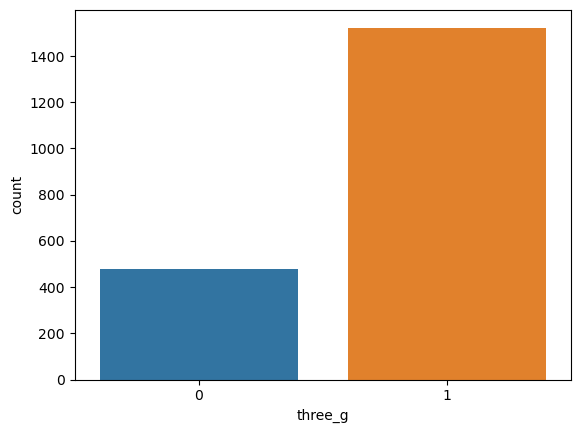

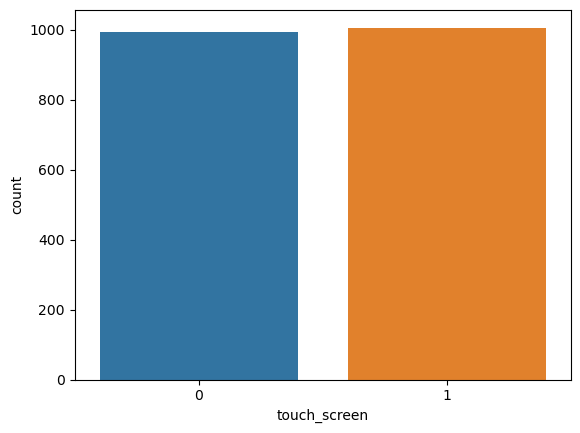

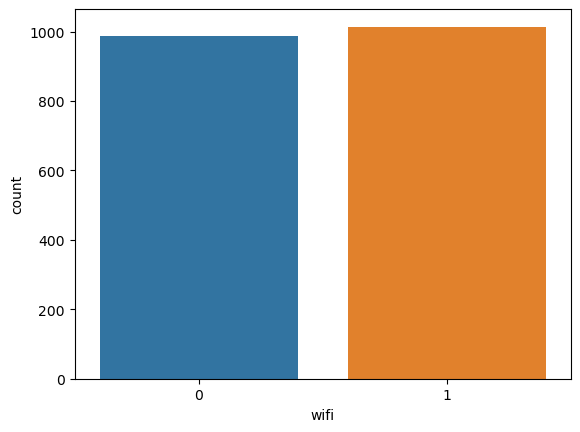

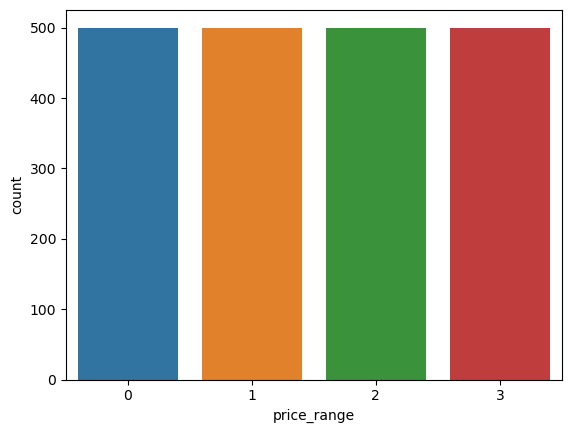

In [20]:
for i in df_train:
    if(df_train[i].nunique()<10):
        sns.countplot(x=df_train[i])
        plt.show()

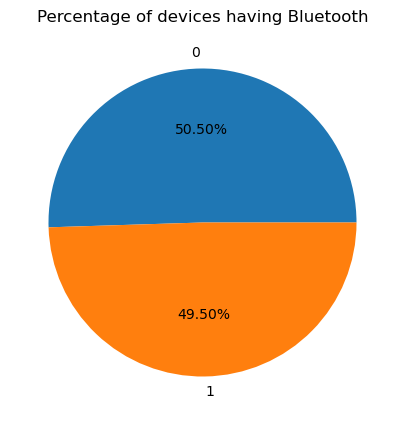

In [21]:
count = df_train['blue'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having Bluetooth")
plt.show()

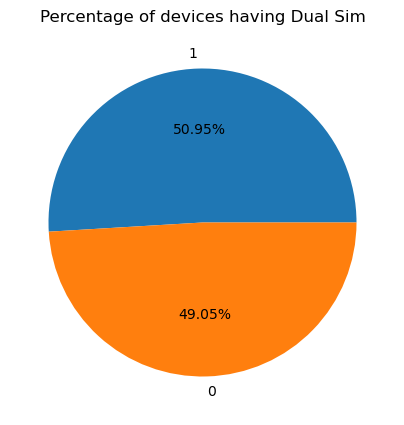

In [22]:
count = df_train['dual_sim'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having Dual Sim")
plt.show()

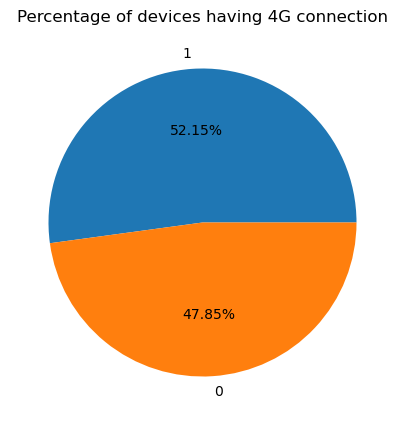

In [23]:
count = df_train['four_g'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having 4G connection")
plt.show()

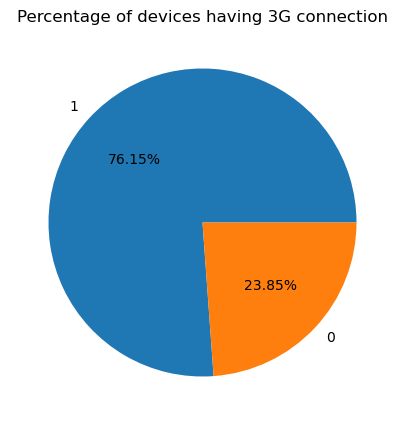

In [24]:
count = df_train['three_g'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having 3G connection")
plt.show()

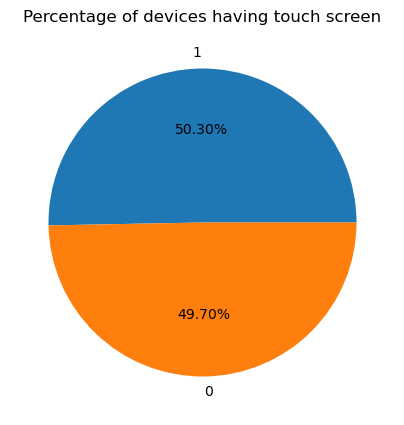

In [25]:
count = df_train['touch_screen'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having touch screen")
plt.show()

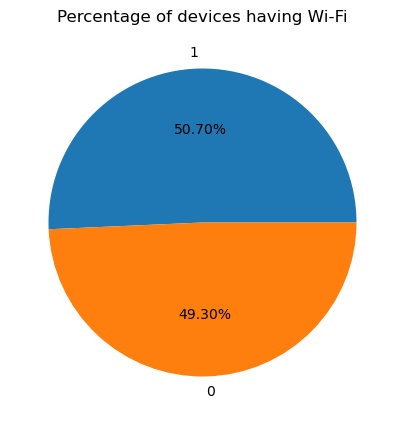

In [26]:
count = df_train['wifi'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having Wi-Fi")
plt.show()

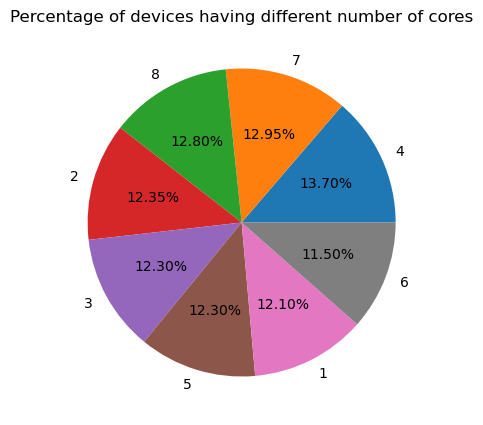

In [27]:
count = df_train['n_cores'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having different number of cores")
plt.show()

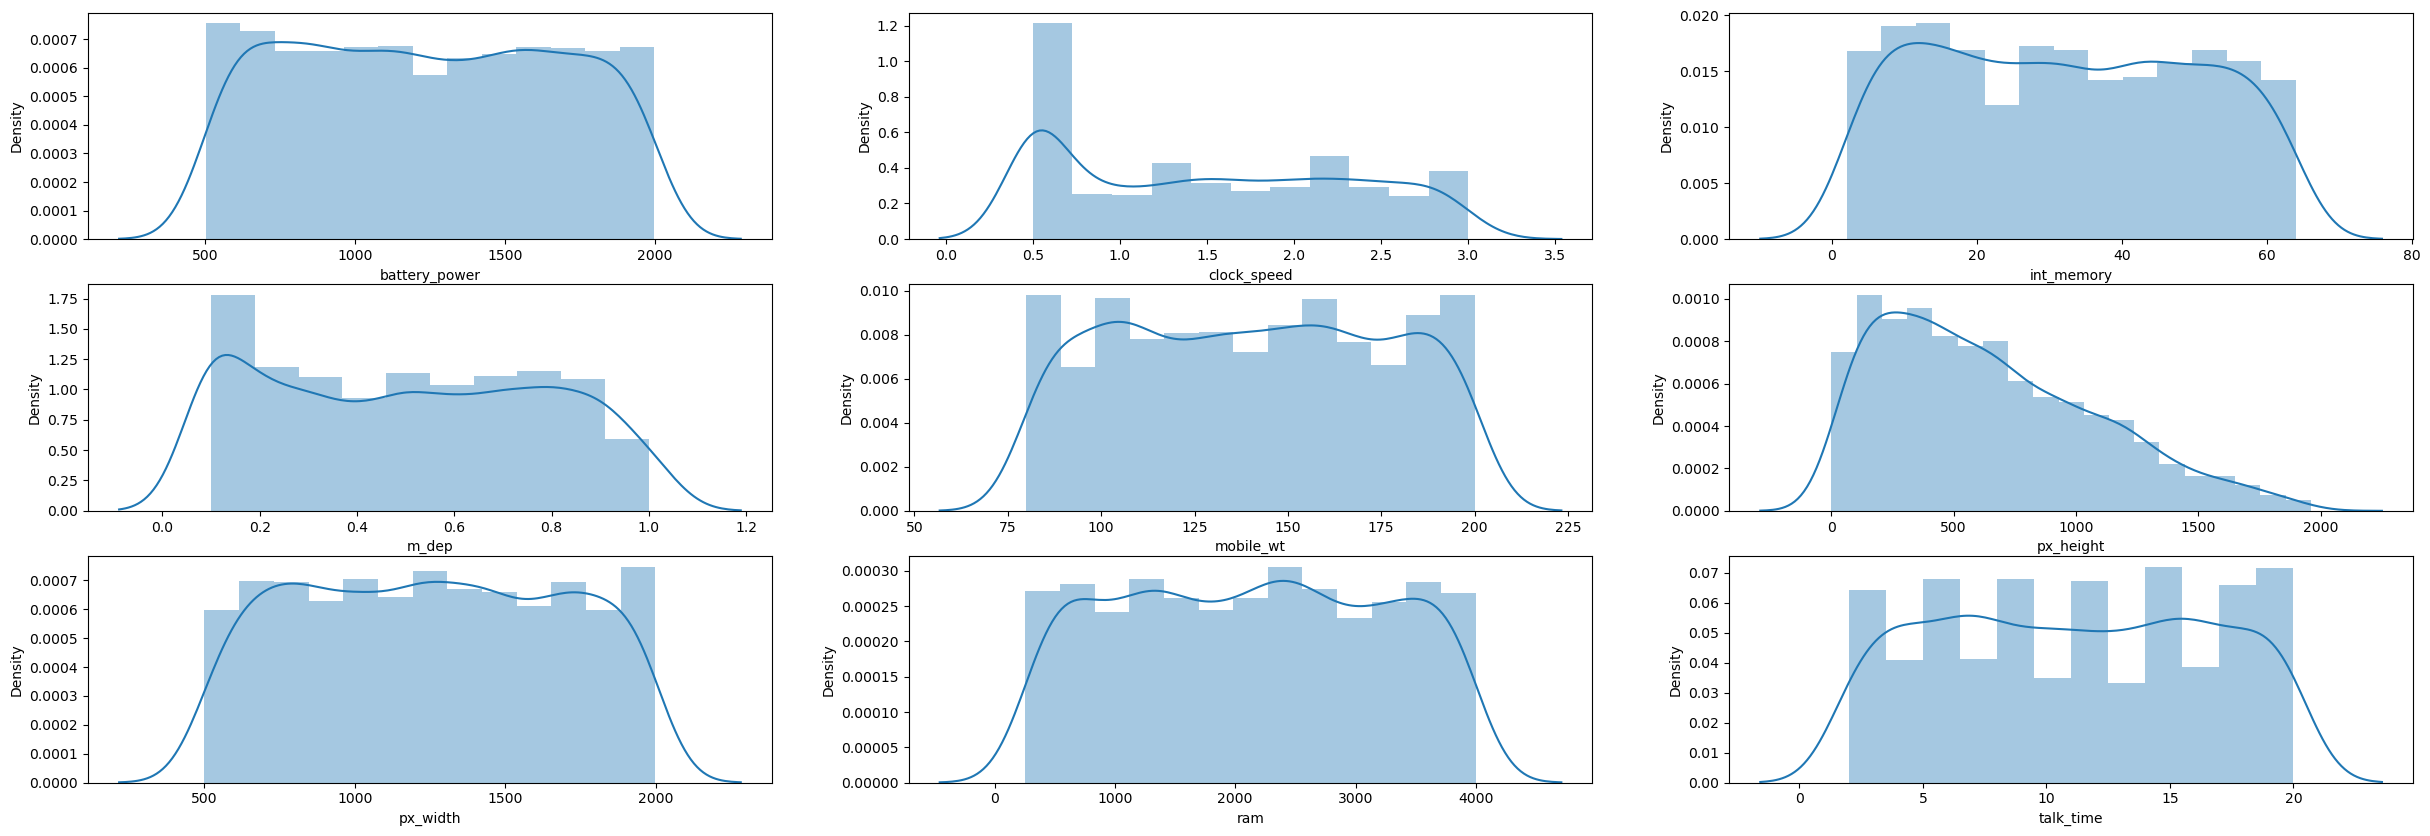

In [28]:
plt.figure(figsize=(30,10))
plt.subplot(331)
sns.distplot(df_train['battery_power'])
plt.subplot(332)
sns.distplot(df_train['clock_speed'])
plt.subplot(333)
sns.distplot(df_train['int_memory'])
plt.subplot(334)
sns.distplot(df_train['m_dep'])
plt.subplot(335)
sns.distplot(df_train['mobile_wt'])
plt.subplot(336)
sns.distplot(df_train['px_height'])
plt.subplot(337)
sns.distplot(df_train['px_width'])
plt.subplot(338)
sns.distplot(df_train['ram'])
plt.subplot(339)
sns.distplot(df_train['talk_time'])
plt.show()

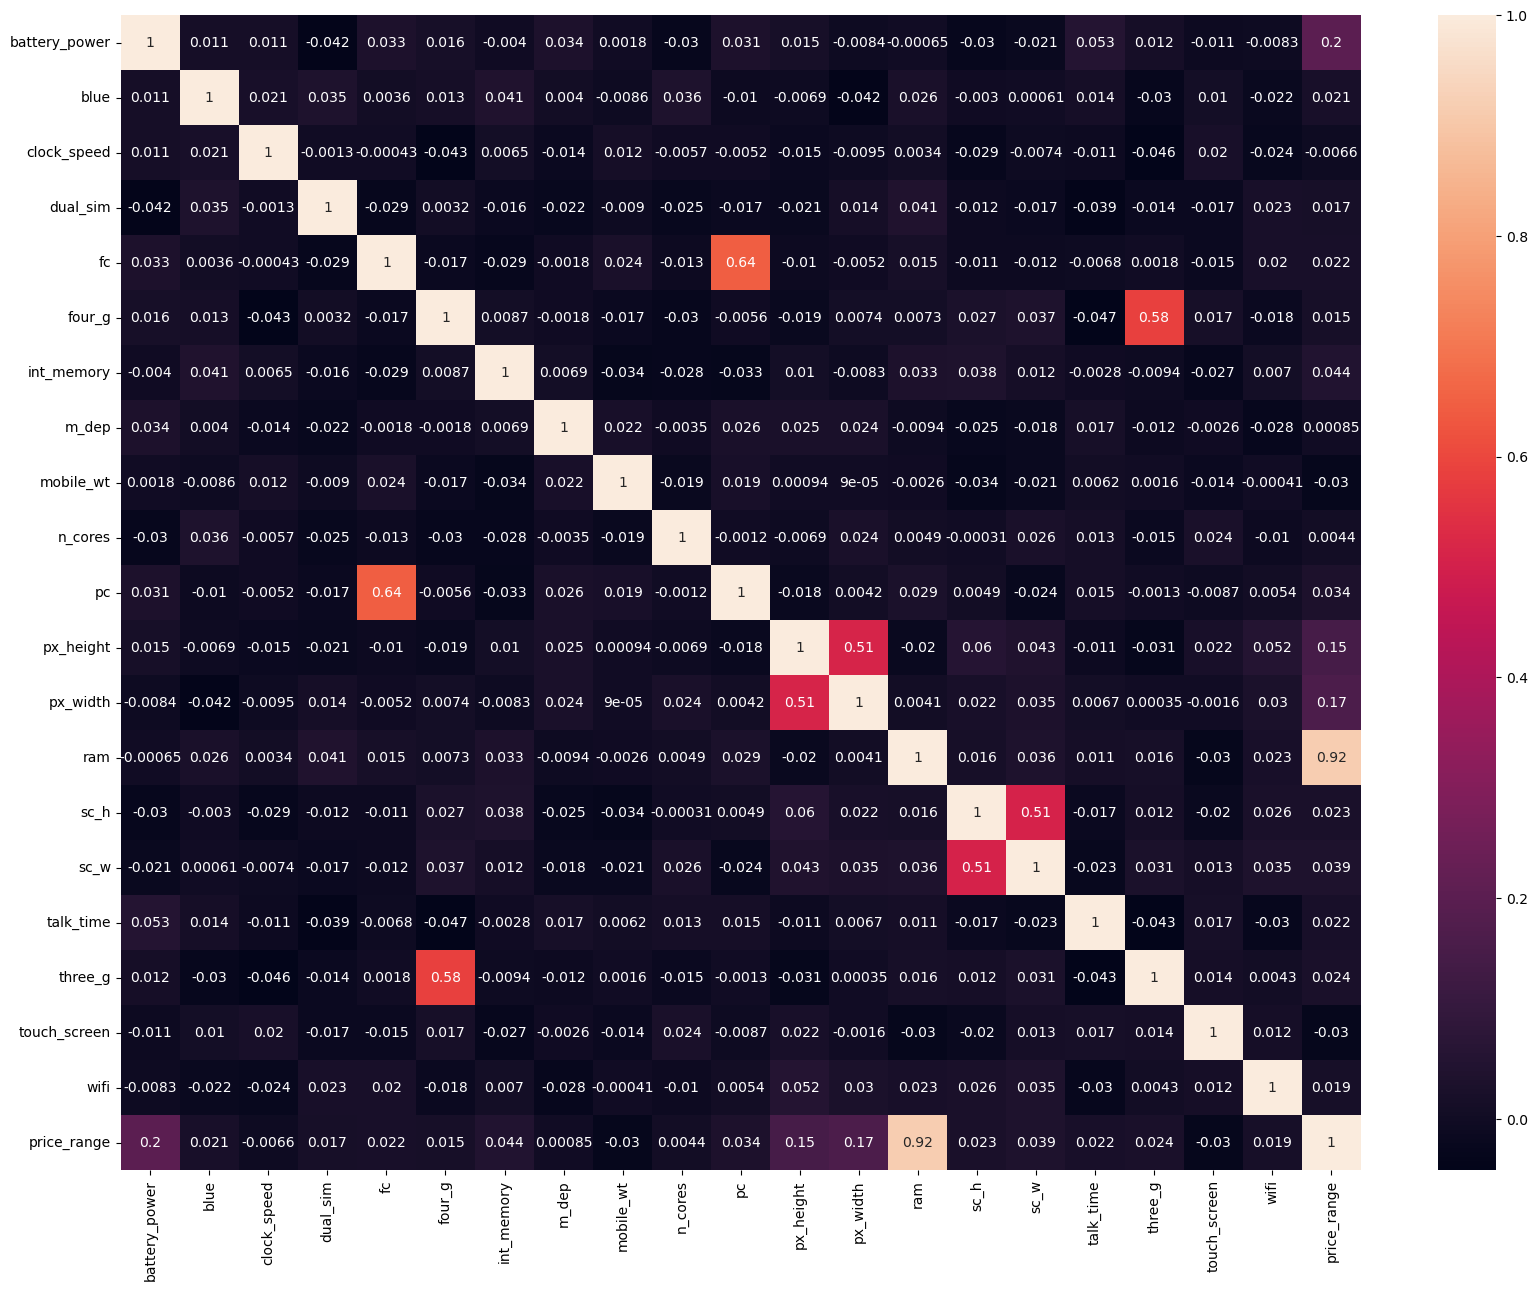

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

<Axes: xlabel='price_range', ylabel='ram'>

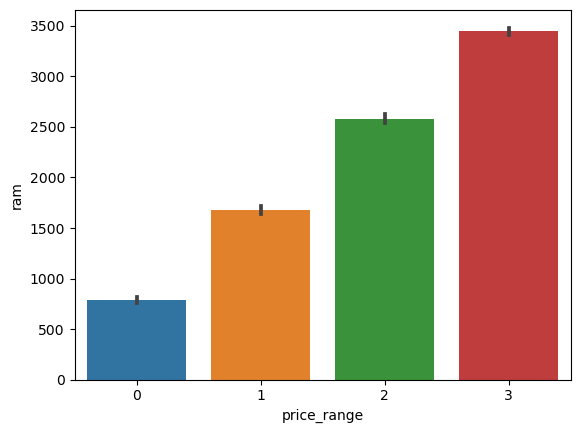

In [30]:
plt.figure()
sns.barplot(y='ram', x='price_range', data = df_train)

<Axes: xlabel='price_range', ylabel='int_memory'>

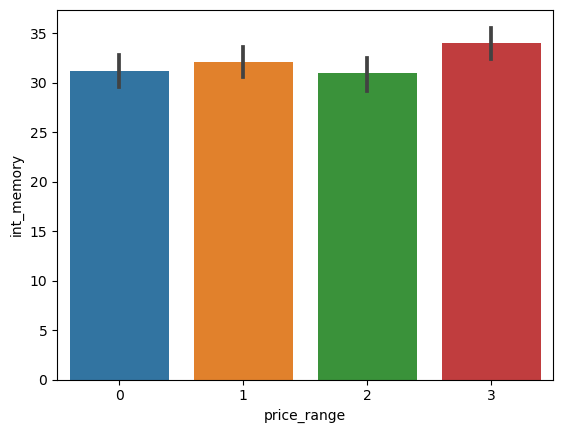

In [31]:
plt.figure()
sns.barplot(y='int_memory', x='price_range', data = df_train)

<Axes: xlabel='price_range', ylabel='battery_power'>

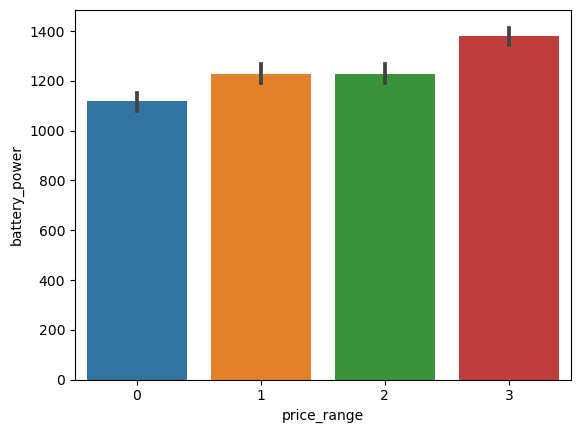

In [32]:
plt.figure()
sns.barplot(y='battery_power', x='price_range', data = df_train)

<Axes: xlabel='price_range', ylabel='touch_screen'>

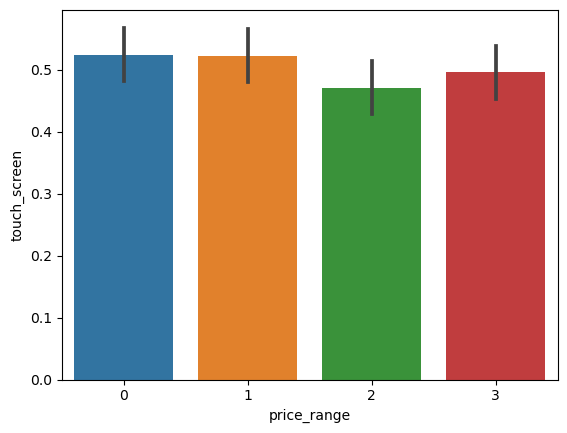

In [33]:
plt.figure()
sns.barplot(y='touch_screen', x='price_range', data = df_train)

<Axes: xlabel='price_range', ylabel='px_width'>

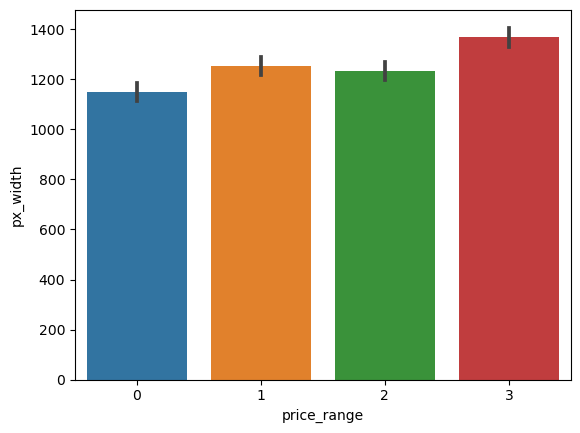

In [34]:
plt.figure()
sns.barplot(y='px_width', x='price_range', data = df_train)

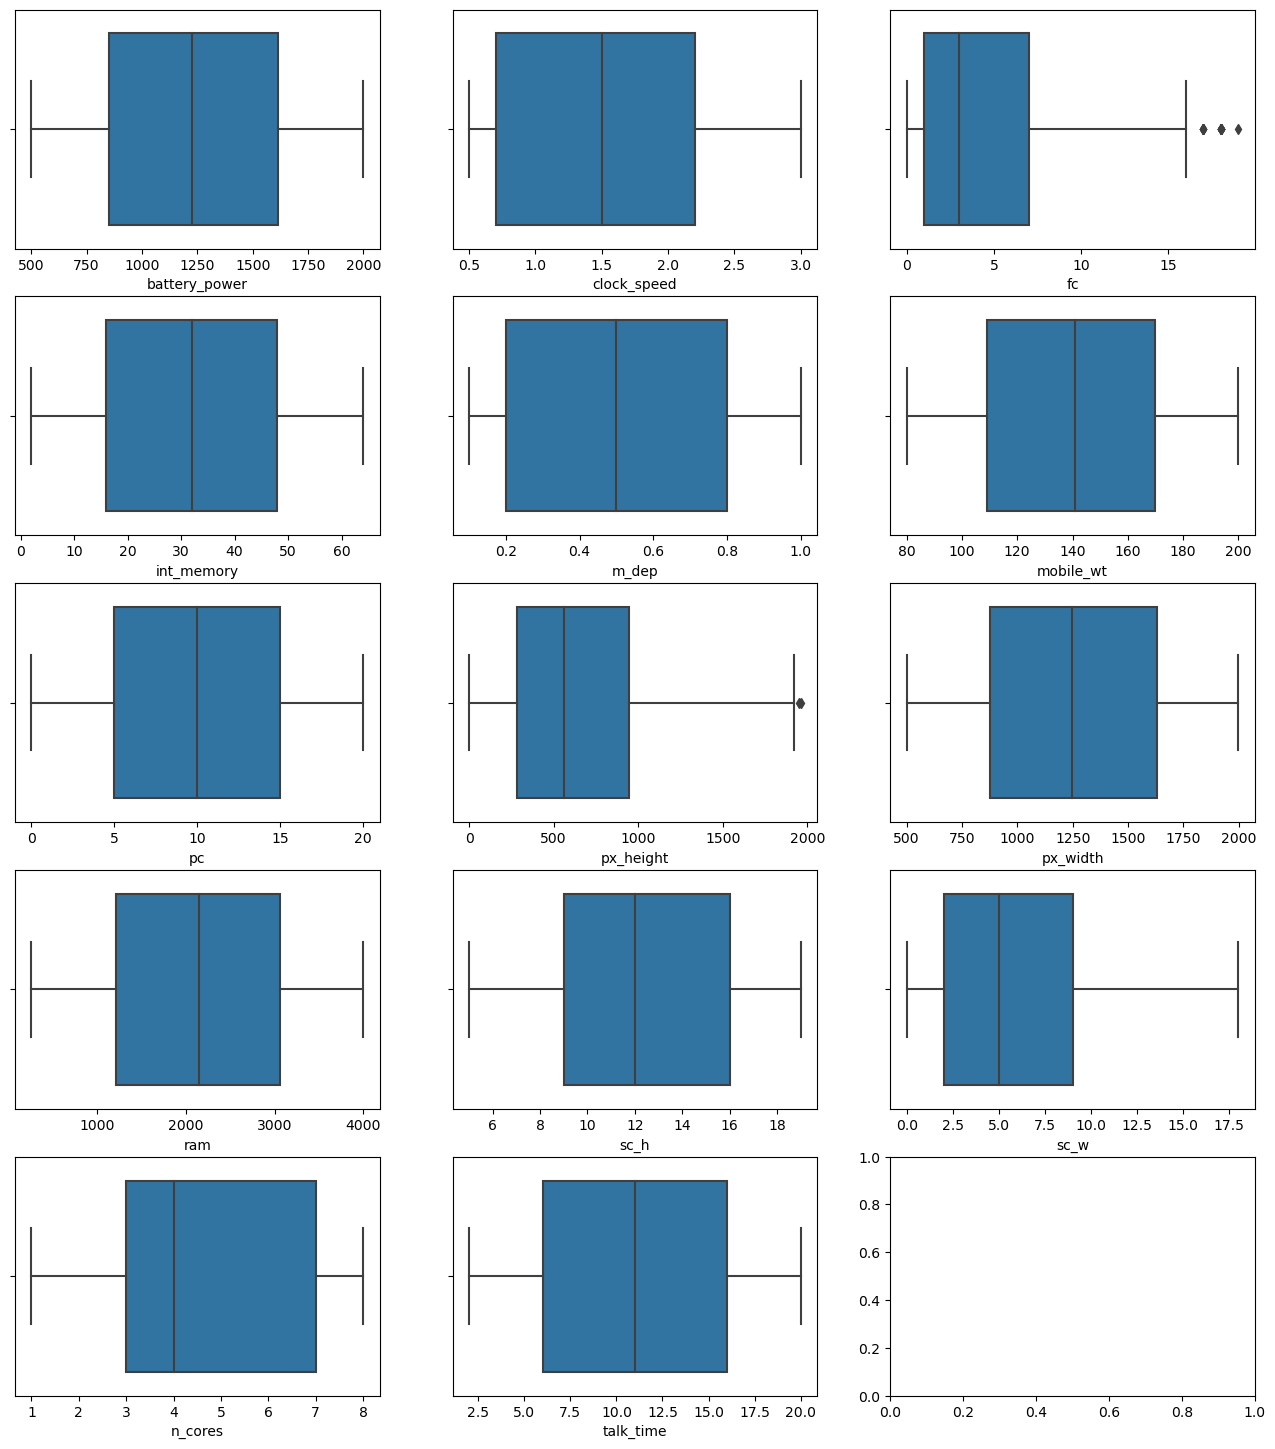

In [35]:
fig,axes = plt.subplots(5,3, figsize = (16,18))
sns.boxplot(x=df_train['battery_power'], ax = axes[0,0])
sns.boxplot(x=df_train['clock_speed'], ax = axes[0,1])
sns.boxplot(x=df_train['fc'], ax = axes[0,2])
sns.boxplot(x=df_train['int_memory'], ax = axes[1,0])
sns.boxplot(x=df_train['m_dep'], ax = axes[1,1])
sns.boxplot(x=df_train['mobile_wt'], ax = axes[1,2])
sns.boxplot(x=df_train['pc'], ax = axes[2,0])
sns.boxplot(x=df_train['px_height'], ax = axes[2,1])
sns.boxplot(x=df_train['px_width'], ax = axes[2,2])
sns.boxplot(x=df_train['ram'], ax = axes[3,0])
sns.boxplot(x=df_train['sc_h'], ax = axes[3,1])
sns.boxplot(x=df_train['sc_w'], ax = axes[3,2])
sns.boxplot(x=df_train['n_cores'], ax = axes[4,0])
sns.boxplot(x=df_train['talk_time'], ax = axes[4,1])

plt.show()

In [36]:
df1 = df_train.loc[:,['battery_power','blue','four_g','mobile_wt','n_cores','px_height','px_width','price_range','talk_time','three_g','wifi','clock_speed']]
df1

,battery_power,blue,four_g,mobile_wt,n_cores,px_height,px_width,price_range,talk_time,three_g,wifi,clock_speed
0,842,0,0,188,2,20,756,1,19,0,1,2.2
1,1021,1,1,136,3,905,1988,2,7,1,0,0.5
2,563,1,1,145,5,1263,1716,2,9,1,0,0.5
3,615,1,0,131,6,1216,1786,2,11,1,0,2.5
4,1821,1,1,141,2,1208,1212,1,15,1,0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,106,6,1222,1890,0,19,1,0,0.5
1996,1965,1,0,187,4,915,1965,2,16,1,1,2.6
1997,1911,0,1,108,8,868,1632,3,5,1,0,0.9
1998,1512,0,1,145,5,336,670,0,19,1,1,0.9


In [37]:
df2 = df_train.loc[:,['dual_sim','fc','m_dep','int_memory','pc','ram','sc_h','sc_w','touch_screen']]
df2

,dual_sim,fc,m_dep,int_memory,pc,ram,sc_h,sc_w,touch_screen
0,0,1,0.6,7,2,2549,9,7,0
1,1,0,0.7,53,6,2631,17,3,1
2,1,2,0.9,41,6,2603,11,2,1
3,0,0,0.8,10,9,2769,16,8,0
4,0,13,0.6,44,14,1411,8,2,1
...,...,...,...,...,...,...,...,...,...
1995,1,0,0.8,2,14,668,13,4,1
1996,1,0,0.2,39,3,2032,11,10,1
1997,1,1,0.7,36,3,3057,9,1,1
1998,0,4,0.1,46,5,869,18,10,1


In [38]:
df3 = pd.concat([df1,df2], axis = 1)
df3

,battery_power,blue,four_g,mobile_wt,n_cores,px_height,px_width,price_range,talk_time,three_g,...,clock_speed,dual_sim,fc,m_dep,int_memory,pc,ram,sc_h,sc_w,touch_screen
0,842,0,0,188,2,20,756,1,19,0,...,2.2,0,1,0.6,7,2,2549,9,7,0
1,1021,1,1,136,3,905,1988,2,7,1,...,0.5,1,0,0.7,53,6,2631,17,3,1
2,563,1,1,145,5,1263,1716,2,9,1,...,0.5,1,2,0.9,41,6,2603,11,2,1
3,615,1,0,131,6,1216,1786,2,11,1,...,2.5,0,0,0.8,10,9,2769,16,8,0
4,1821,1,1,141,2,1208,1212,1,15,1,...,1.2,0,13,0.6,44,14,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,106,6,1222,1890,0,19,1,...,0.5,1,0,0.8,2,14,668,13,4,1
1996,1965,1,0,187,4,915,1965,2,16,1,...,2.6,1,0,0.2,39,3,2032,11,10,1
1997,1911,0,1,108,8,868,1632,3,5,1,...,0.9,1,1,0.7,36,3,3057,9,1,1
1998,1512,0,1,145,5,336,670,0,19,1,...,0.9,0,4,0.1,46,5,869,18,10,1


In [39]:
X = df_train.drop(['price_range'], axis = 1)
y = df_train['price_range']

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(12,'Score'))

         Features          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556


[0.06044398 0.02026273 0.03346049 0.01912817 0.0329538  0.01720002
 0.0348746  0.03360491 0.03737694 0.03318557 0.03447241 0.04525269
 0.04893715 0.39160821 0.03403029 0.03382642 0.03577651 0.01374404
 0.01944884 0.02041224]


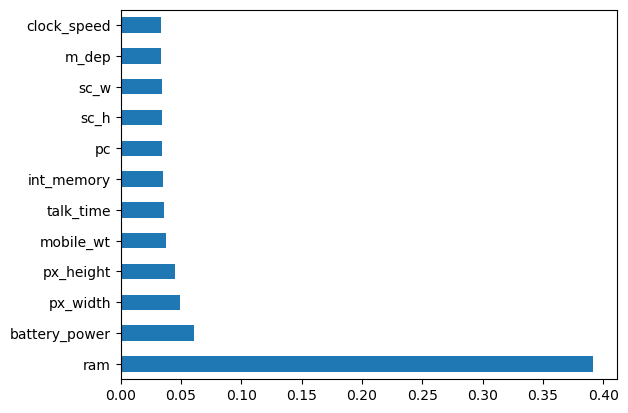

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
ranked_features = pd.Series(model.feature_importances_,index = X.columns)
ranked_features.nlargest(12).plot(kind='barh')
plt.show()

<Axes: >

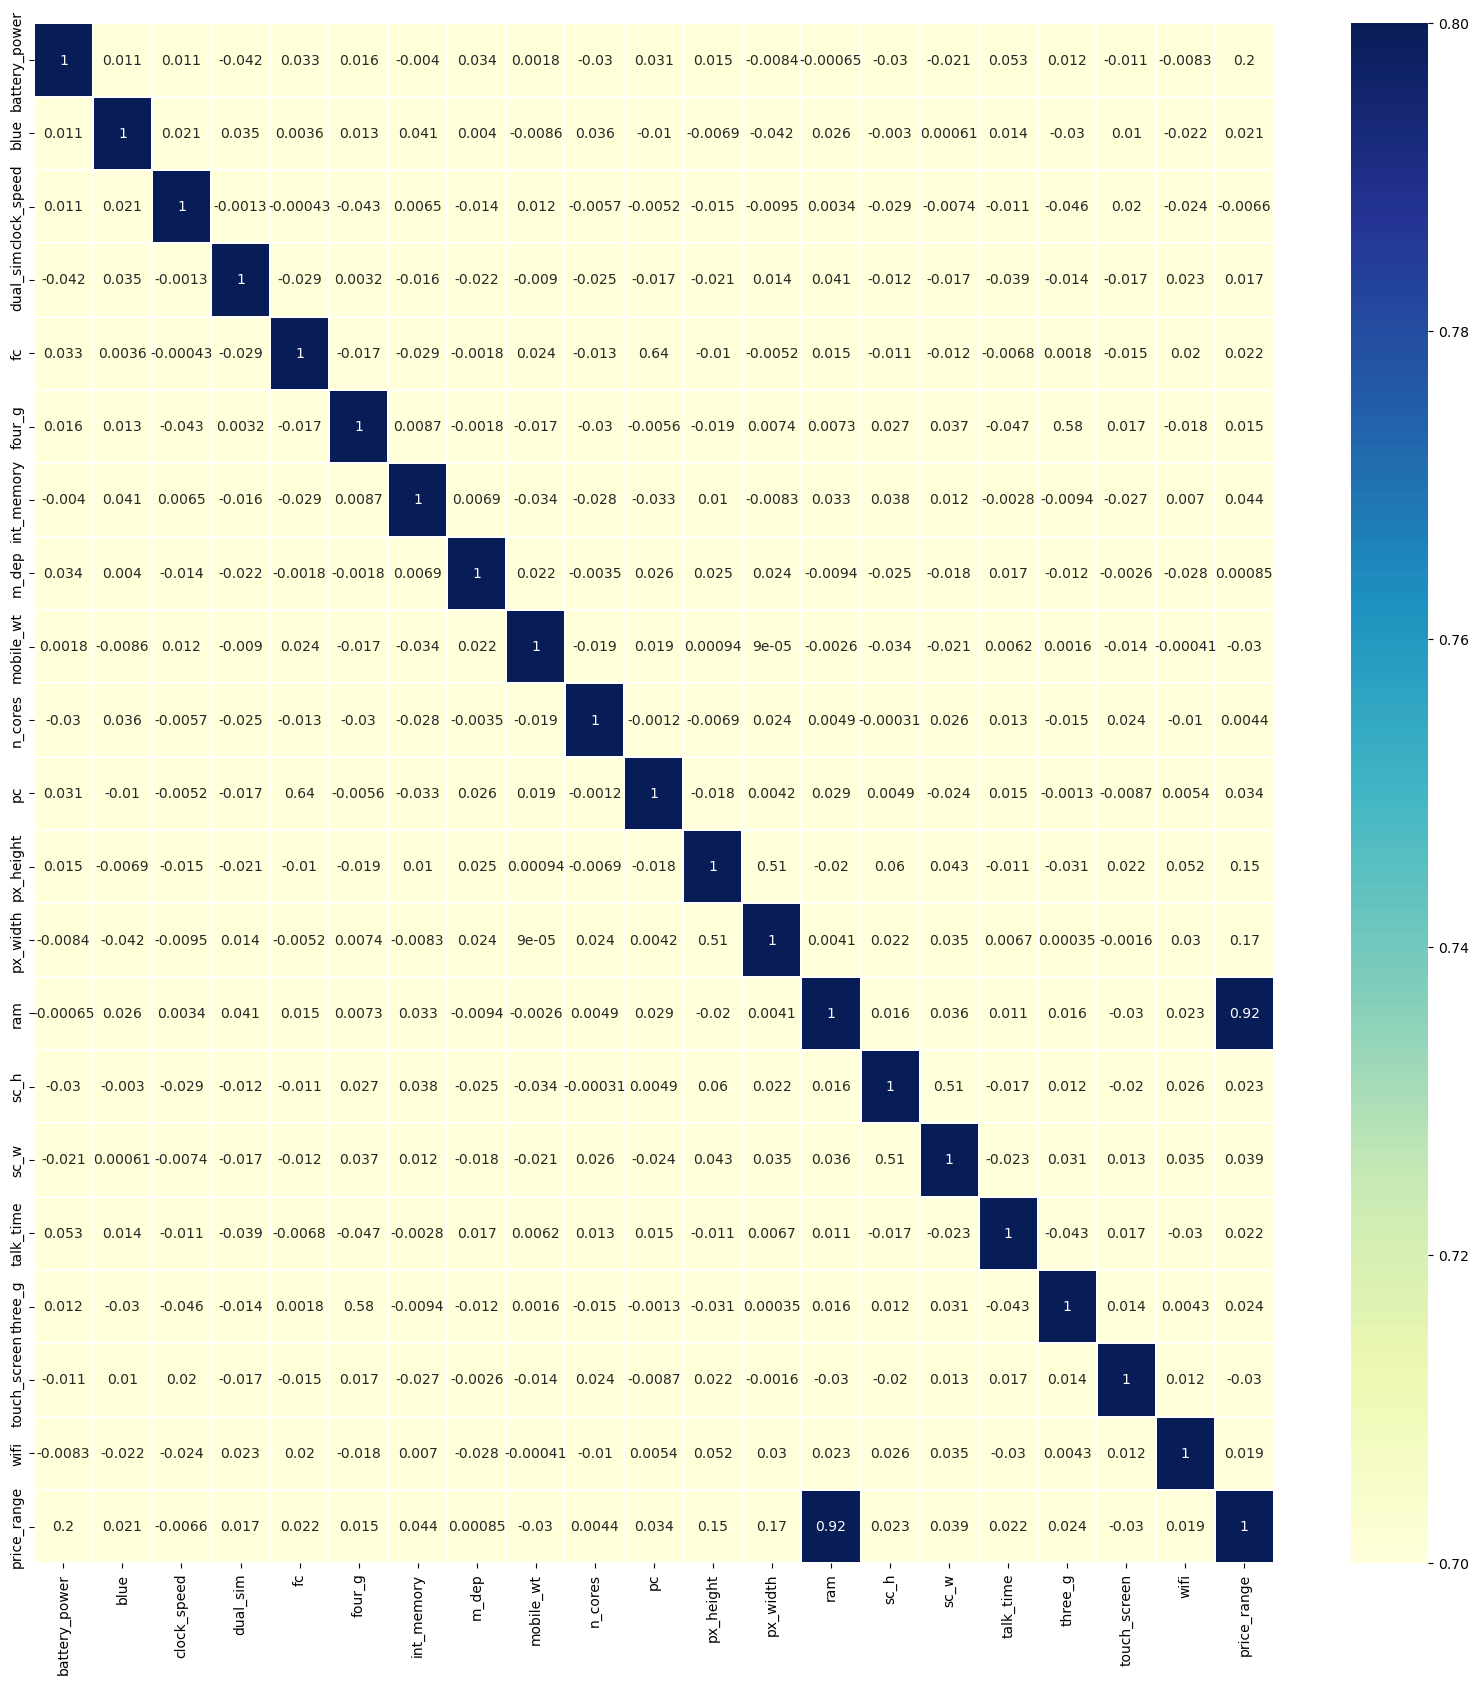

In [42]:
corrmatrix = df_train.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmatrix,vmin=0.7,vmax=0.8,annot=True,linewidths=0.2,cmap='YlGnBu')

In [43]:
from sklearn.preprocessing import StandardScaler
X = df_train.drop('price_range',axis=1)
y = df_train['price_range']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(X)
df_train_scaled = pd.DataFrame(df_train_scaled)
df_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

In [45]:
print("x_train:",X_train.shape)
print("x_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (1500, 20)
x_test: (500, 20)
y_train: (1500,)
y_test: (500,)


In [46]:
y = df_train["price_range"]
y.value_counts(normalize=True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

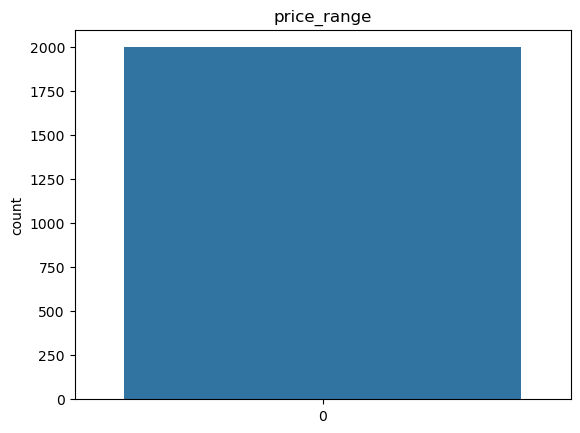

In [47]:
sns.countplot(y)
plt.title("price_range")
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred = logit_model.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Result from logistic regression ")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.65
Result from logistic regression 


,precision,recall,f1-score,support
0,0.838710,0.859504,0.848980,121.000000
1,0.572727,0.543103,0.557522,116.000000
2,0.464000,0.467742,0.465863,124.000000
3,0.709220,0.719424,0.714286,139.000000
accuracy,0.650000,0.650000,0.650000,0.650000
macro avg,0.646164,0.647443,0.646663,500.000000
weighted avg,0.648076,0.650000,0.648904,500.000000


In [51]:
confusion_matrix(y_test,y_pred)

array([[104,  18,   2,   0],
       [ 17,  63,  25,   5],
       [  0,  33,  58,  34],
       [  0,   2,  39, 100]], dtype=int64)

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Results from Decision Tree")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.854
Results from Decision Tree


,precision,recall,f1-score,support
0,0.911290,0.911290,0.911290,124.000000
1,0.827273,0.784483,0.805310,116.000000
2,0.800000,0.793651,0.796813,126.000000
3,0.872340,0.917910,0.894545,134.000000
accuracy,0.854000,0.854000,0.854000,0.854000
macro avg,0.852726,0.851834,0.851990,500.000000
weighted avg,0.853315,0.854000,0.853367,500.000000


In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [54]:
y_pred = rf_model.predict(X_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Results from RandomForest Classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.886
Results from RandomForest Classifier


,precision,recall,f1-score,support
0,0.983871,0.953125,0.968254,128.000000
1,0.845455,0.823009,0.834081,113.000000
2,0.776000,0.822034,0.798354,118.000000
3,0.929078,0.929078,0.929078,141.000000
accuracy,0.886000,0.886000,0.886000,0.886000
macro avg,0.883601,0.881811,0.882442,500.000000
weighted avg,0.888080,0.886000,0.886787,500.000000


In [55]:
confusion_matrix(y_test,y_pred)

array([[122,   2,   0,   0],
       [  6,  93,  11,   0],
       [  0,  18,  97,  10],
       [  0,   0,  10, 131]], dtype=int64)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = [] 
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values)

[0.924, 0.916, 0.924, 0.938, 0.946, 0.944, 0.942, 0.946, 0.942, 0.95, 0.946, 0.948]


Text(0, 0.5, 'Accuracy')

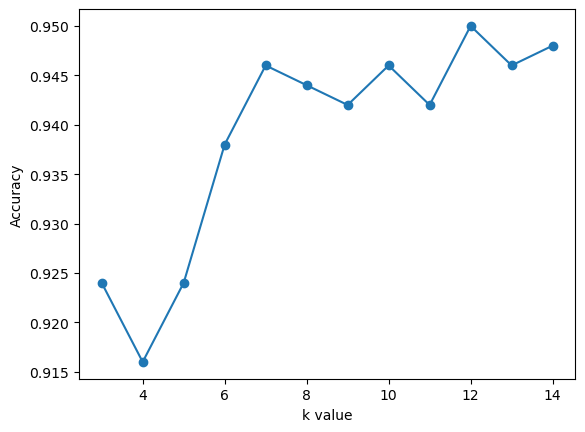

In [57]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [58]:
classifier = KNeighborsClassifier(n_neighbors = 14,metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy score is :',accuracy_score(y_test,y_pred))
print("Results from K-NN")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

accuracy score is : 0.948
Results from K-NN


,precision,recall,f1-score,support
0,0.991935,0.953488,0.972332,129.000000
1,0.936364,0.953704,0.944954,108.000000
2,0.936000,0.914062,0.924901,128.000000
3,0.929078,0.970370,0.949275,135.000000
accuracy,0.948000,0.948000,0.948000,0.948000
macro avg,0.948344,0.947906,0.947866,500.000000
weighted avg,0.948641,0.948000,0.948051,500.000000


In [59]:
confusion_matrix(y_test,y_pred)

array([[123,   1,   0,   0],
       [  6, 103,   1,   0],
       [  0,   4, 117,   4],
       [  0,   0,  10, 131]], dtype=int64)

In [60]:
df_test = pd.read_csv('MobileDataSets\MobileTest.csv',index_col='id')

In [61]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [62]:
df_test_scaled = scaler.fit_transform(df_test)
df_test_scaled

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [63]:
test_pred = logit_model.predict(df_test_scaled)

In [64]:
result = pd.DataFrame(test_pred)

In [65]:
print(result)

     0
0    0
1    0
2    0
3    3
4    3
..  ..
995  0
996  0
997  3
998  0
999  3

[1000 rows x 1 columns]


In [66]:
pd.DataFrame(result).to_csv('result.csv')

In [67]:
df_train['rank_by_price'] = df_train['price_range'].rank()
df1 = df_train

In [68]:
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [69]:
df1['rank_by_price'] = df1['rank_by_price'].sort_values()
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [70]:
df1.sort_values(by=['rank_by_price'])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


In [71]:
RankedData = df1.rank()
RankedData.sort_values(by='price_range')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5


In [72]:
r = df1
r["rank_by_price"] = r["price_range"].rank()
r["rank_by_battery"] = r["battery_power"].rank(ascending=False)
r["rank_by_blueooth"] = r["blue"].rank(ascending=False)
r["rank_by_clockspeed"] = r["clock_speed"].rank(ascending=False)
r["rank_by_DualSIM"] = r["dual_sim"].rank(ascending=False)
r["rank_by_fc"] = r["fc"].rank(ascending=False)
r["rank_by_4G"] = r["four_g"].rank(ascending=False)
r["rank_by_InternalMemory"] = r["int_memory"].rank(ascending=False)
r["rank_by_mdep"] = r["m_dep"].rank(ascending=False)
r["rank_by_weight"] = r["mobile_wt"].rank(ascending=True)
r["rank_by_ncores"] = r["n_cores"].rank(ascending=False)
r["rank_by_pc"] = r["pc"].rank(ascending=False)
r["rank_by_height"] = r["px_height"].rank(ascending=False)
r["rank_by_width"] = r["px_width"].rank(ascending=False)
r["rank_by_ram"] = r["ram"].rank(ascending=False)
r["rank_by_sch"] = r["sc_h"].rank(ascending=False)
r["rank_by_scw"] = r["sc_w"].rank(ascending=False)
r["rank_by_talktime"] = r["talk_time"].rank(ascending=False)
r["rank_by_3G"] = r["three_g"].rank(ascending=False)
r["rank_by_touchscreen"] = r["touch_screen"].rank(ascending=False)
r["rank_by_wifi"] = r["wifi"].rank(ascending=False)
r.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [73]:
RankedData = r.iloc[:,21:]
RankedData

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5
